In [1]:
import sys
import os
sys.path.append(os.path.abspath('..'))

In [25]:
import src.preprocess as pre
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
meta, y, df, schedule, scaler = pre.create_files('../data/',normalize=False)


/Users/zakir/Documents/Projects/CherryOnTop/src/preprocess.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df['Type'].str.rstrip()
/Users/zakir/Documents/Projects/CherryOnTop/src/preprocess.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Parcel'] = df['Parcel'].str.upper()
/Users/zakir/Documents/Projects/CherryOnTop/src/preprocess.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

In [4]:
y.sum(axis=1)

array([14768., 21302., 24530., ...,  7789.,  2267.,  9736.])

In [16]:
len(meta[['ProducerCode','Parcel','Class','Type','Variety']].groupby(['ProducerCode','Parcel']).nunique())

48

In [31]:
climate_data = np.array(meta.ClimateSeries.tolist())

In [38]:
total_kilos =y.sum(axis=1)

In [59]:
yield_per_ha = total_kilos / meta.Ha

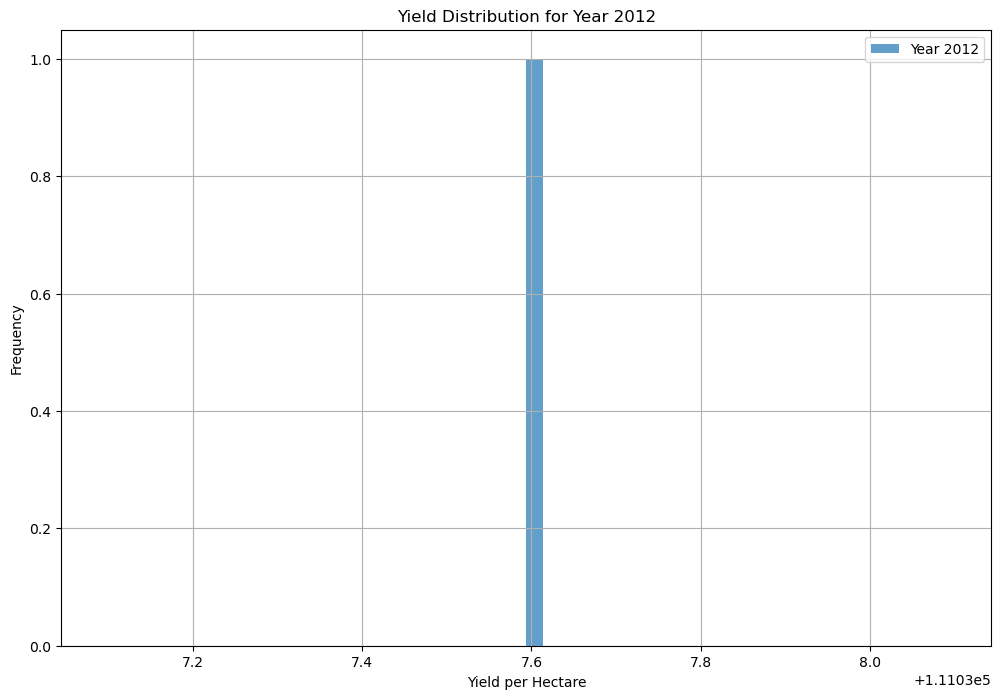

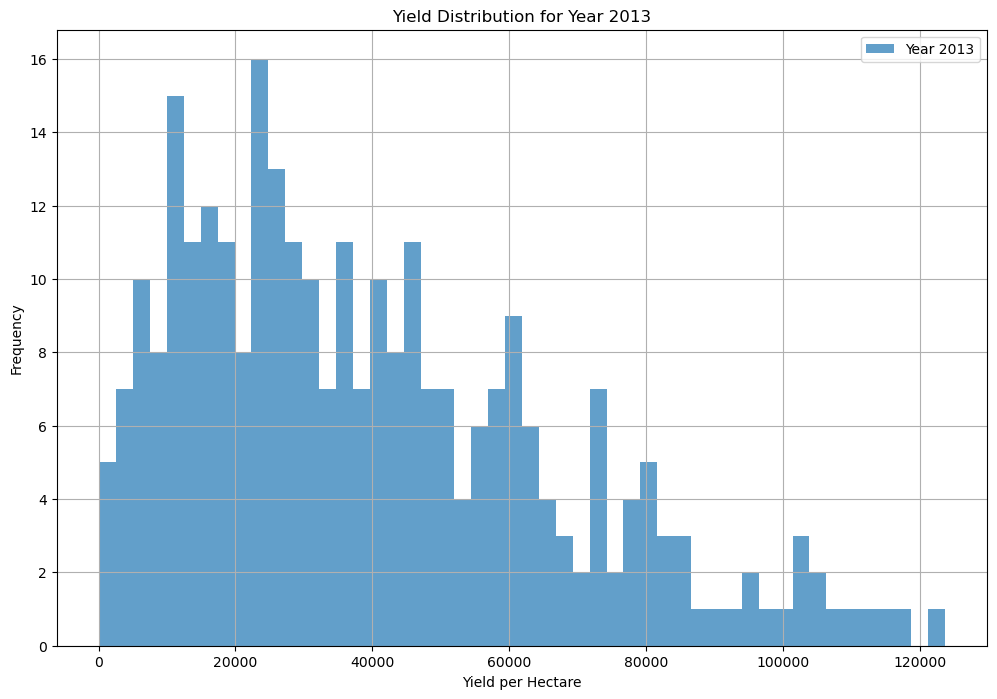

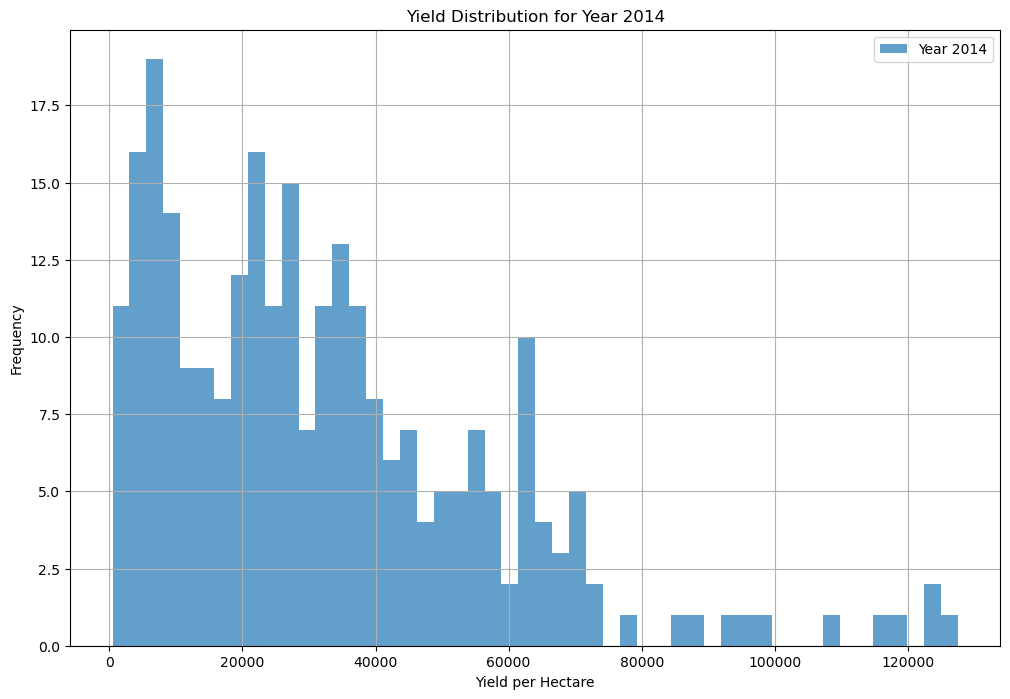

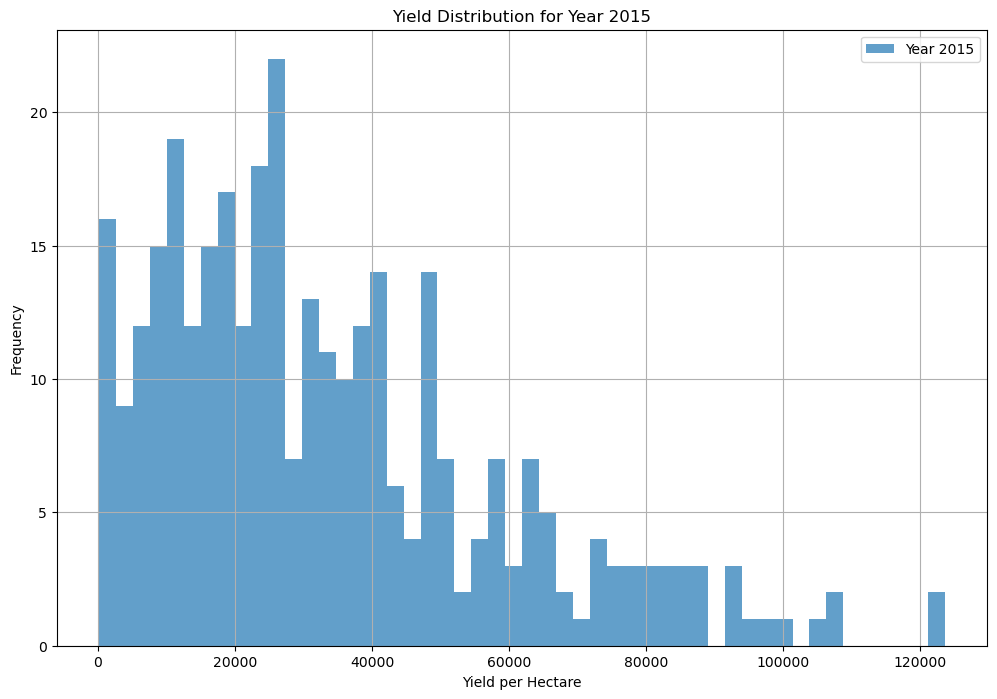

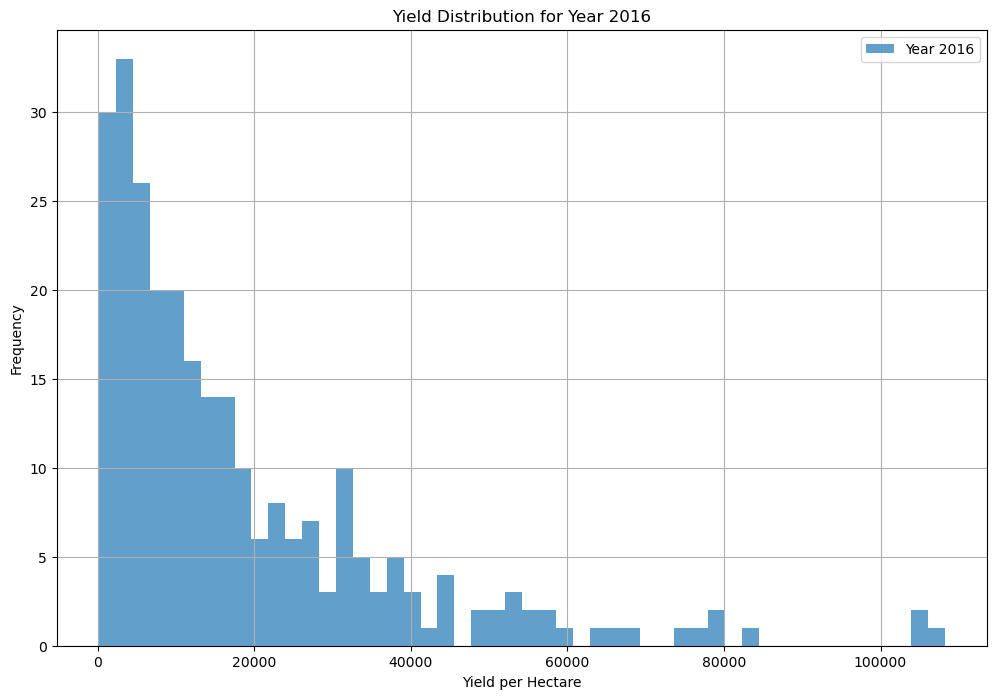

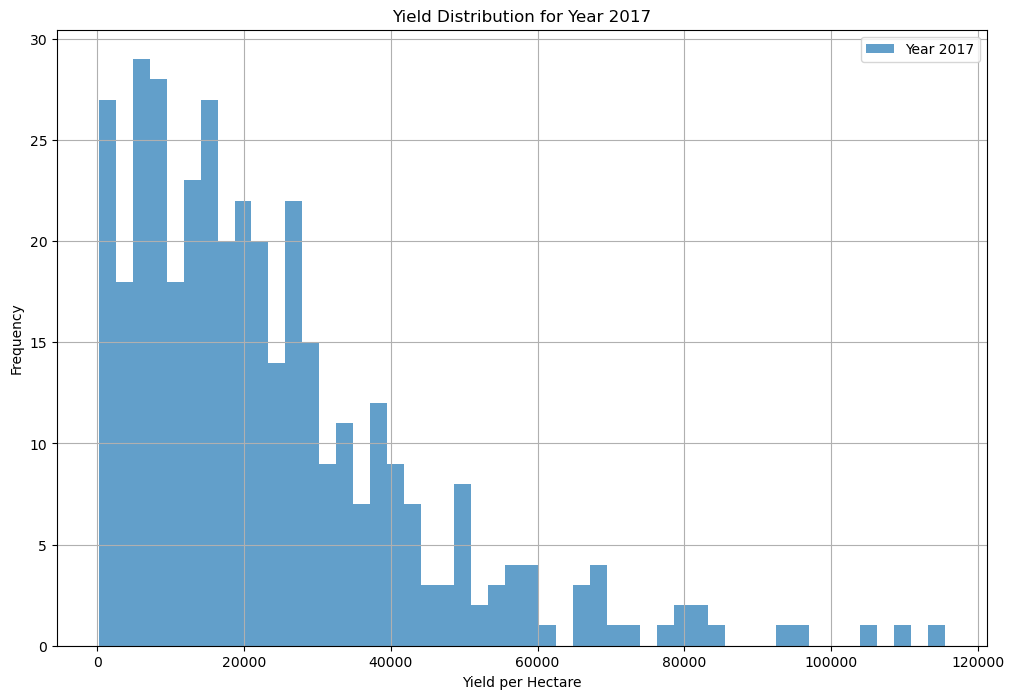

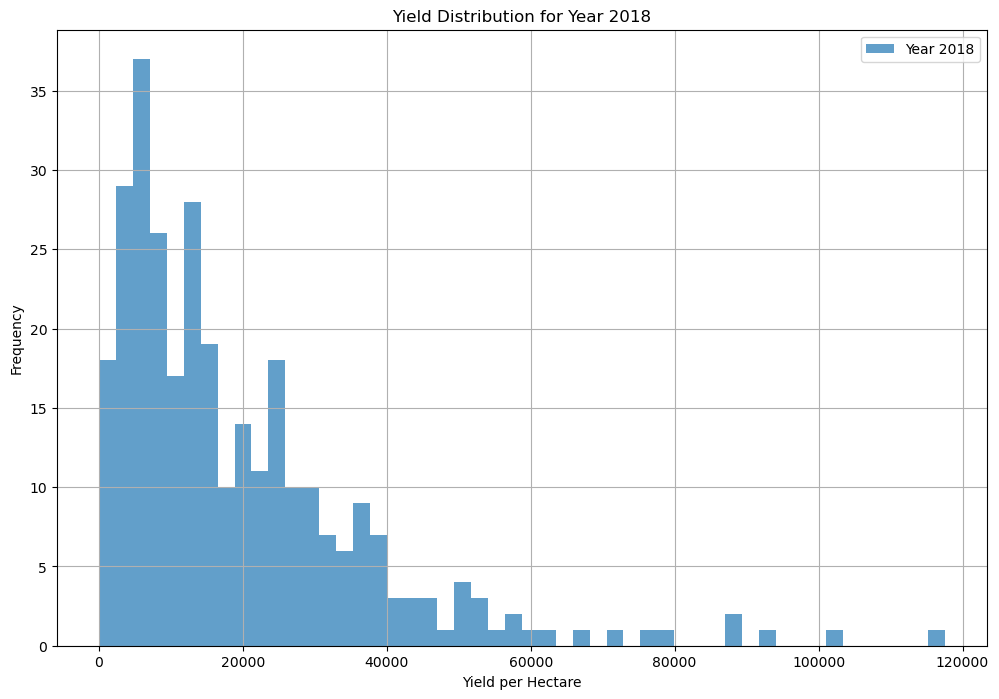

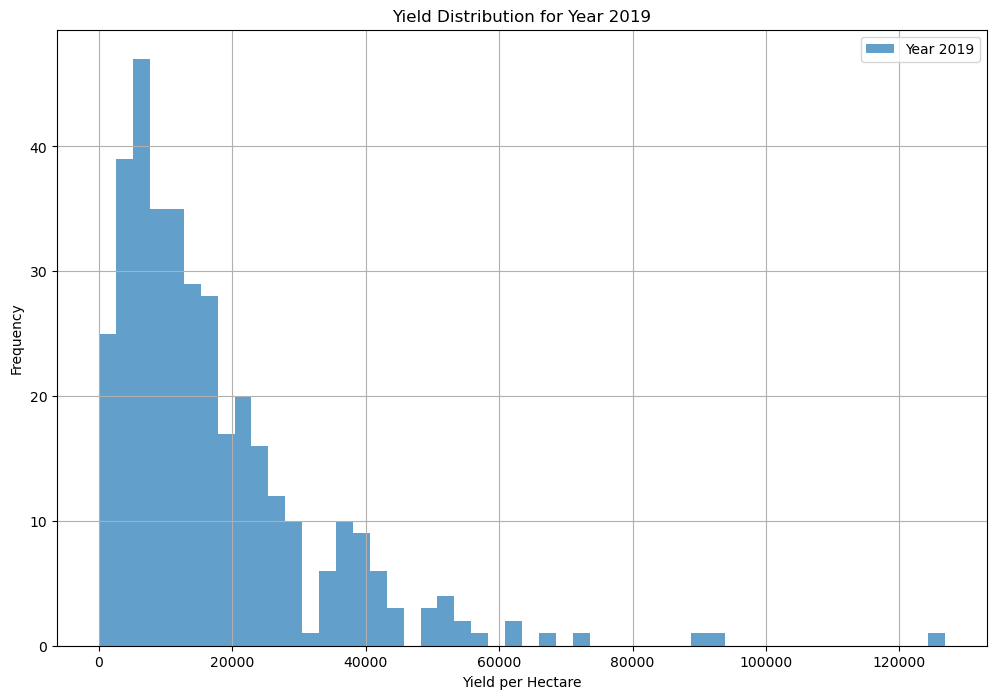

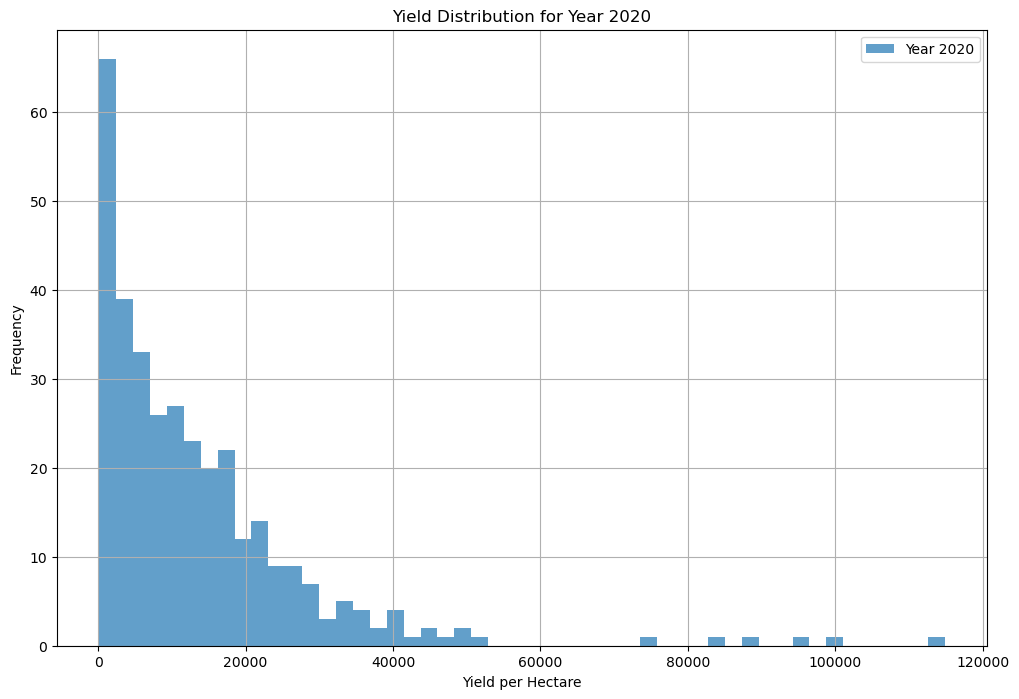

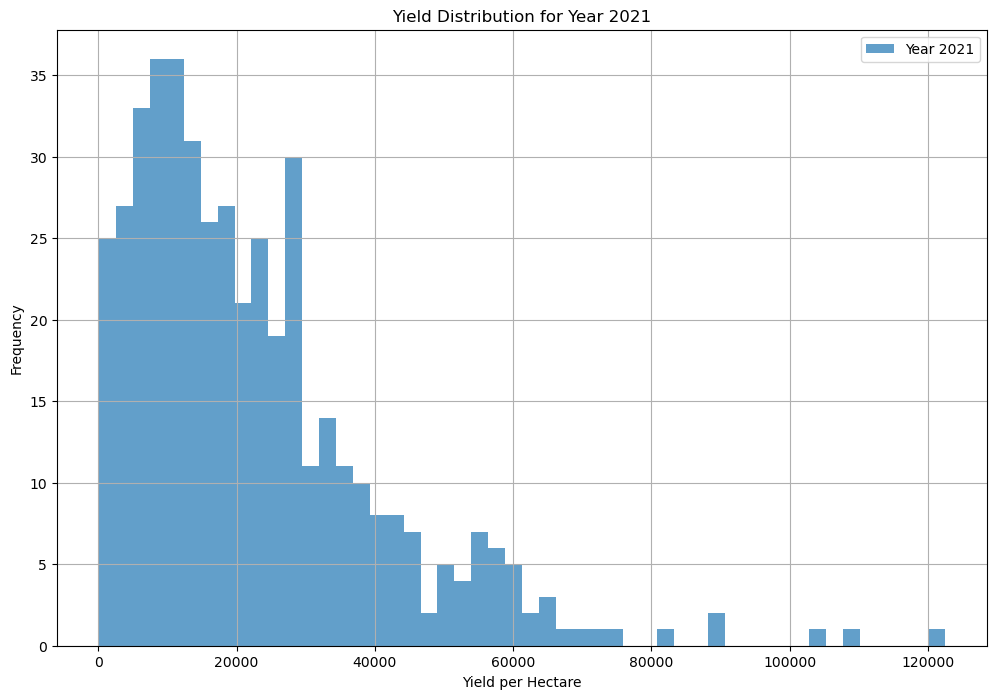

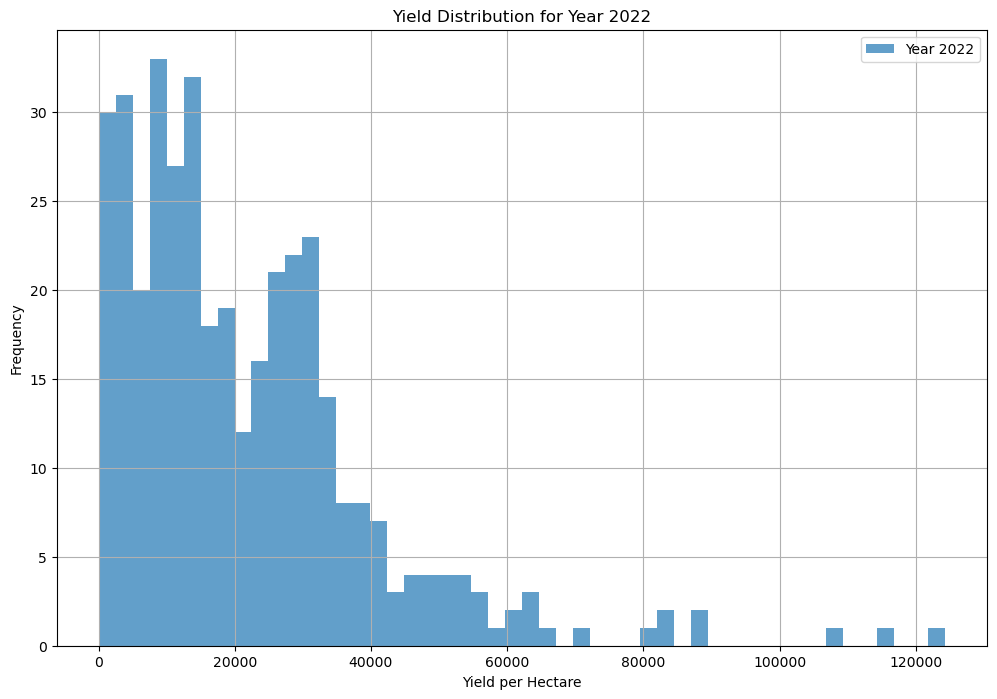

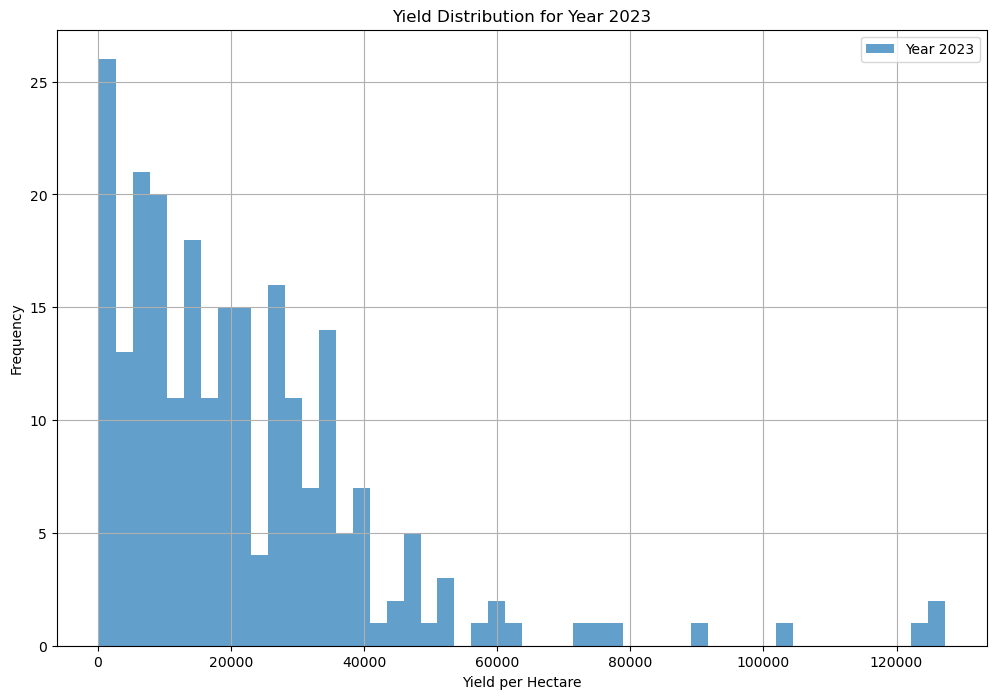

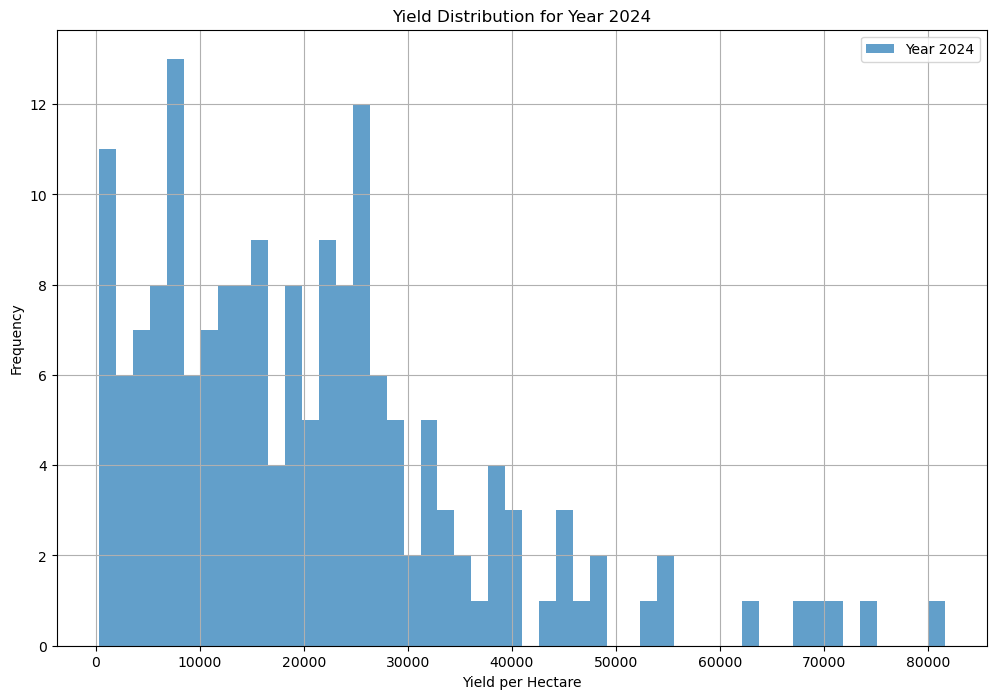

In [64]:
years = meta['TransplantDate'].dt.year.unique()

for year in years:
    plt.figure(figsize=(12, 8))
    yearly_yield = yield_per_ha[meta['TransplantDate'].dt.year == year]
    plt.hist(yearly_yield, bins=50, alpha=0.7, label=f'Year {year}')
    plt.title(f'Yield Distribution for Year {year}')
    plt.xlabel('Yield per Hectare')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
meta

,TransplantDate,Parcel,Lot,ProducerCode,Variety,Ha,Class,Type,WeekTransplanted,WeekCos,WeekSin,Year,ClimateSeries
0,2012-03-28,N02,7,OAP,Shiren,0.1330,CHE,Cherry Rojo,13,-0.0,1.0,2012,"[[20.4895, 4.7395, 0.0, 0.0, 26.27, 4.395357, ..."
11,2013-02-13,Z18,6,ZJL,Felicity,0.3938,CHE,Cherry Rojo,7,0.663123,0.748511,2013,"[[21.5845, 7.1844997, 0.0, 0.0, 20.19, 5.04025..."
12,2013-02-13,Z18,6,ZJL,Shiren,0.3938,CHE,Cherry Rojo,7,0.663123,0.748511,2013,"[[21.5845, 7.1844997, 0.0, 0.0, 20.19, 5.04025..."
13,2013-02-15,Z18,2,ZJL,Amsterdam,0.2700,BSUF,Uva Roja,7,0.663123,0.748511,2013,"[[26.384499, 12.934501, 0.0, 0.0, 15.66, 5.039..."
14,2013-02-15,Z18,2,ZJL,Olivia,0.5400,BSUF,Uva Roja,7,0.663123,0.748511,2013,"[[26.384499, 12.934501, 0.0, 0.0, 15.66, 5.039..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4209,2024-07-25,S12,4,SGB,Top 2323,0.1530,CHE,Cherry Rosa,30,-0.885456,-0.464723,2024,"[[30.9015, 20.1015, 0.0, 0.0, 27.04, 5.6545625..."
4210,2024-07-25,S12,4,SGB,Yoyomo,0.1020,BSUF,Uva Amarilla,30,-0.885456,-0.464723,2024,"[[30.9015, 20.1015, 0.0, 0.0, 27.04, 5.6545625..."
4211,2024-07-29,S12,7,SGB,King,0.5100,BSUF,Uva Roja,31,-0.822984,-0.568065,2024,"[[26.8515, 15.7515, 0.0, 0.0, 28.23, 5.4026065..."
4212,2024-07-29,S12,8,SGB,King,0.0306,BSUF,Uva Roja,31,-0.822984,-0.568065,2024,"[[26.8515, 15.7515, 0.0, 0.0, 28.23, 5.4026065..."


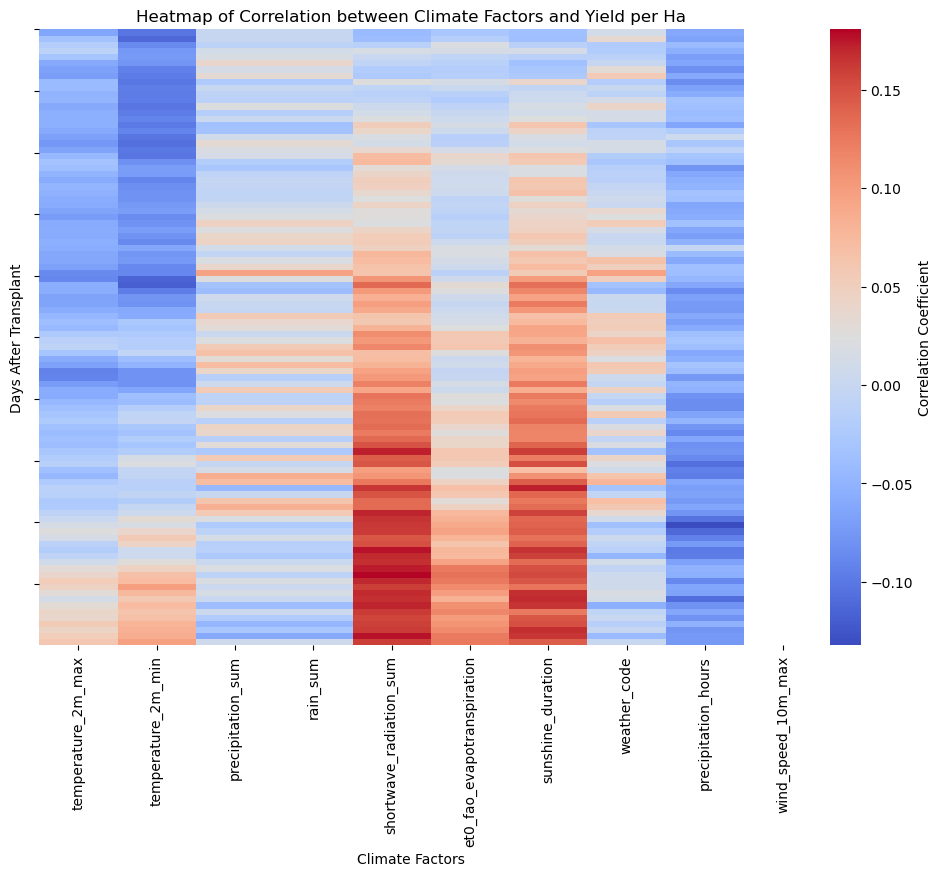

In [51]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

def calculate_climate_correlations(data, target):
    """
    Calculate the correlation between each climate factor in the data and the target.

    Parameters:
    - data: np.ndarray, the climate data array to calculate correlations for.
    - target: np.ndarray, the target array to correlate with.

    Returns:
    - correlations: np.ndarray, the calculated correlation coefficients.
    """
    factor_names = [
        "temperature_2m_max",
        "temperature_2m_min",
        "precipitation_sum",
        "rain_sum",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration",
        "sunshine_duration",
        "weather_code",
        "precipitation_hours",
        "wind_speed_10m_max"
    ]
    factors = data.shape[2]
    days = data.shape[1]
    correlations = np.zeros((days, factors))
    for day in range(days):
        for factor in range(factors):
            correlations[day, factor] = np.corrcoef(data[:, day, factor], target)[0, 1]
    return correlations

def plot_climate_heatmap(data, title):
    """
    Plot a heatmap for the given climate data correlations.

    Parameters:
    - data: np.ndarray, the climate data correlations to plot.
    - title: str, the title of the plot.
    """
    plt.figure(figsize=(12, 8))
    factor_names = [
        "temperature_2m_max",
        "temperature_2m_min",
        "precipitation_sum",
        "rain_sum",
        "shortwave_radiation_sum",
        "et0_fao_evapotranspiration",
        "sunshine_duration",
        "weather_code",
        "precipitation_hours",
        "wind_speed_10m_max"
    ]
    days_labels = [f"Day {i+1}" for i in range(data.shape[0])]
    sns.heatmap(data, xticklabels=factor_names, yticklabels=days_labels, cmap='coolwarm', cbar_kws={'label': 'Correlation Coefficient'})
    plt.yticks(np.arange(0, data.shape[0], step=10))  # Set y-axis ticks in increments of 10
    plt.title(title)
    plt.xlabel('Climate Factors')
    plt.ylabel('Days After Transplant')
    plt.show()

# Calculate yield as total_kilos divided by meta.Ha
yield_per_ha = total_kilos / meta.Ha

# Calculate and plot heatmap of correlations for climate data
climate_correlations = calculate_climate_correlations(climate_data, yield_per_ha)
plot_climate_heatmap(climate_correlations, 'Heatmap of Correlation between Climate Factors and Yield per Ha')



In [52]:
schedule

,iqr_weeks,weighted_mean_weeks,first_harvest,end_harvest,uncertainty
0,4,18.170098,11,22,1.049875
11,2,16.101399,10,18,0.645584
12,3,15.972523,11,19,0.709523
13,4,16.546460,10,19,0.278180
14,1,14.495413,11,15,0.794334
...,...,...,...,...,...
4209,2,19.813000,16,20,0.904099
4210,3,19.368687,15,20,0.749079
4211,3,14.312235,7,19,0.816275
4212,2,14.732245,9,15,1.026907


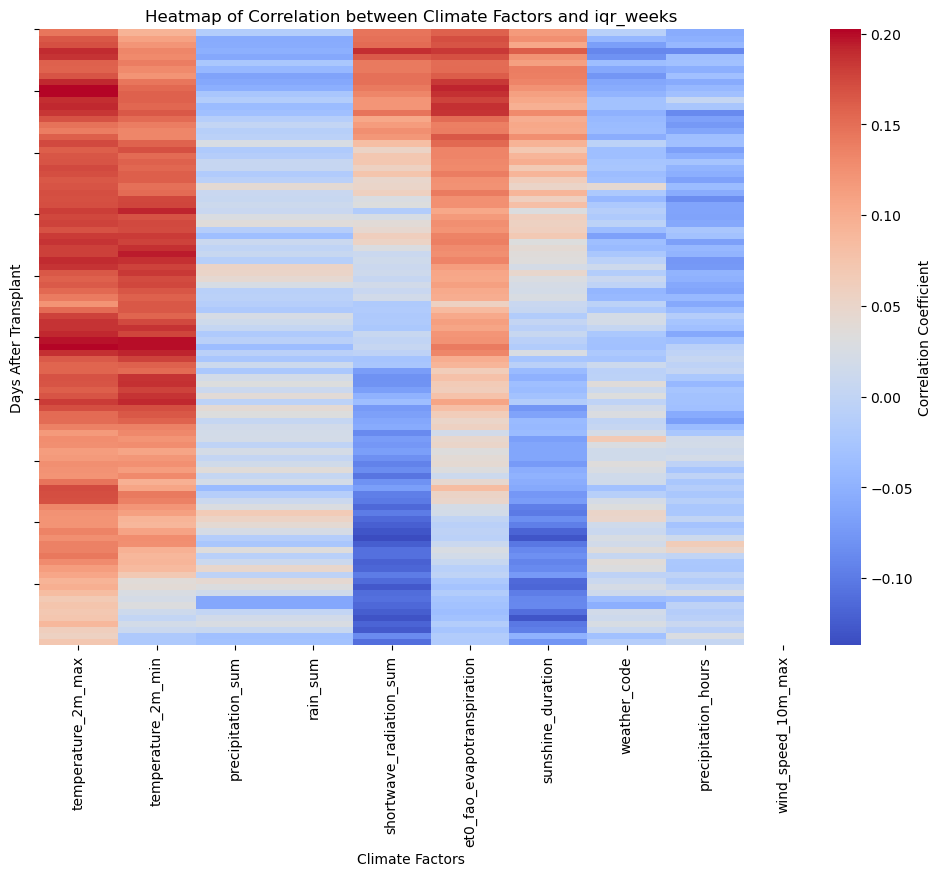

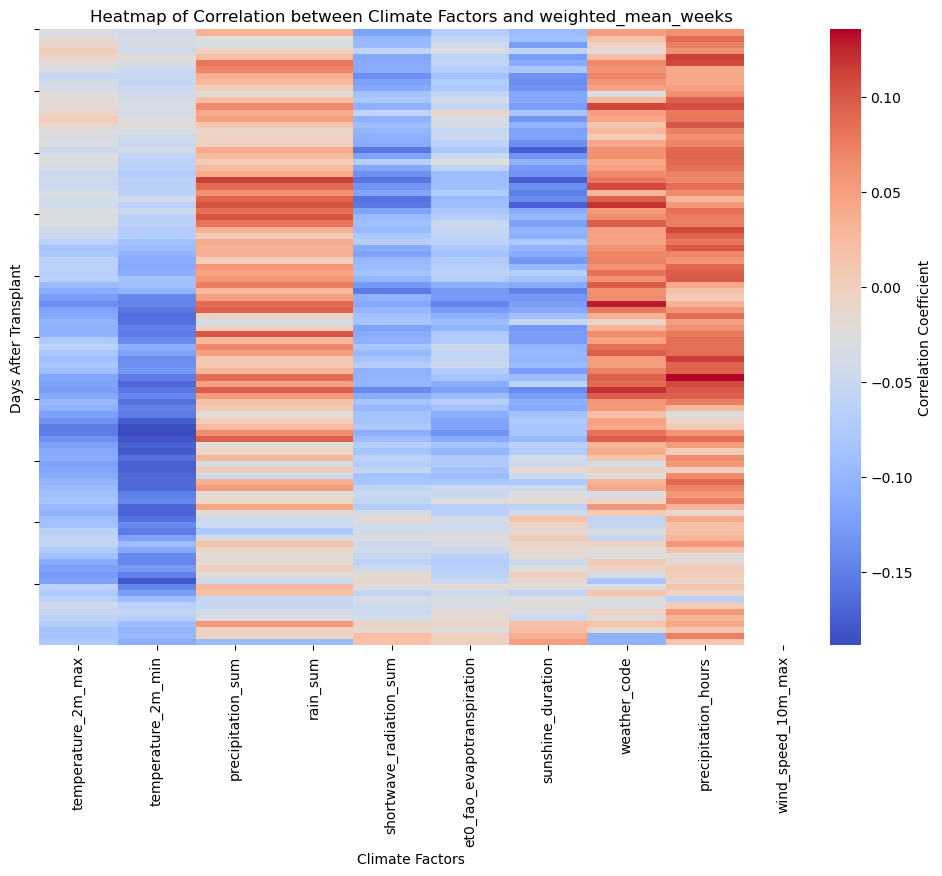

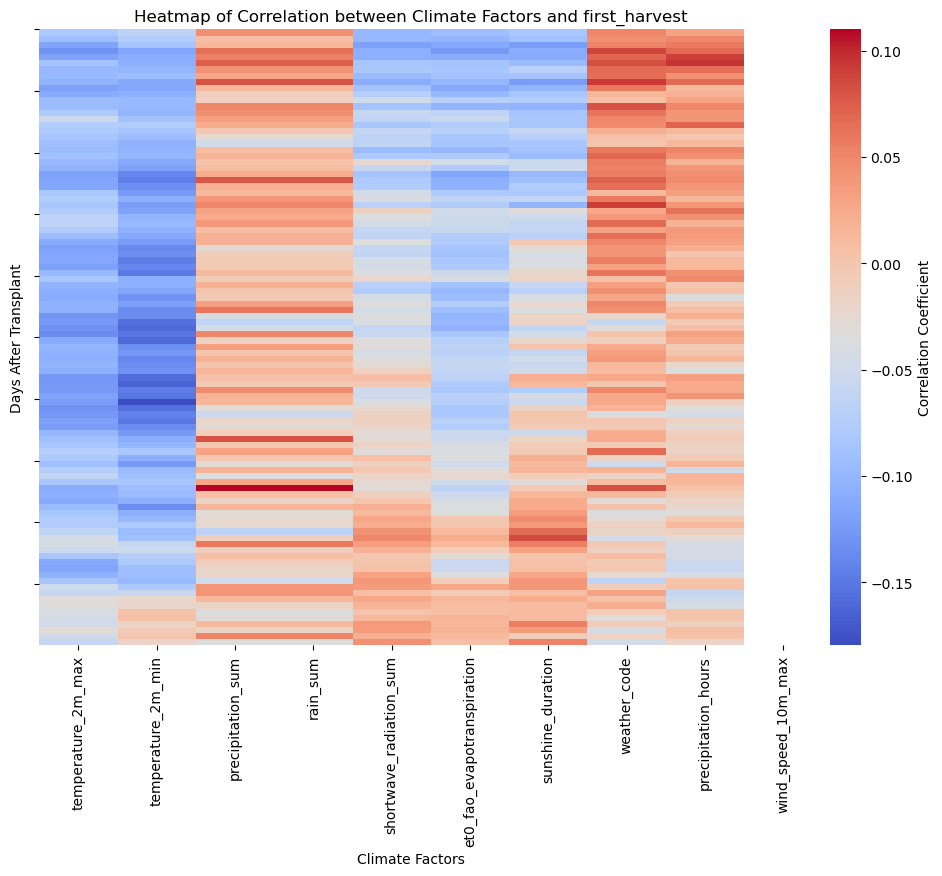

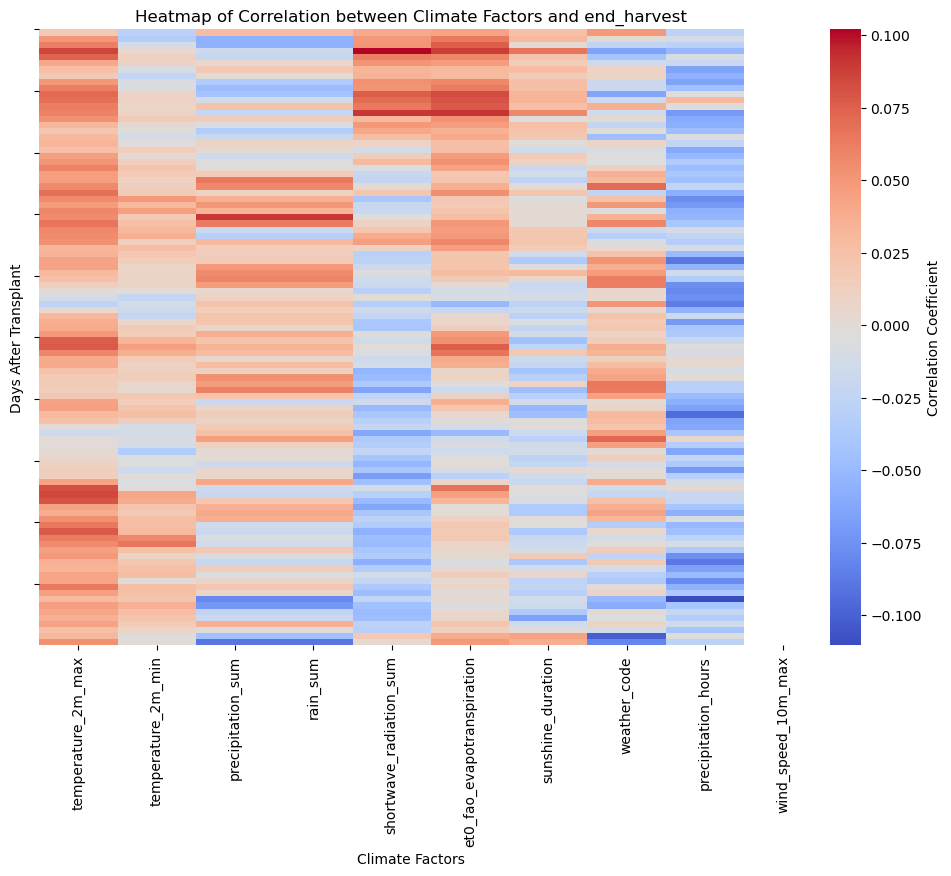

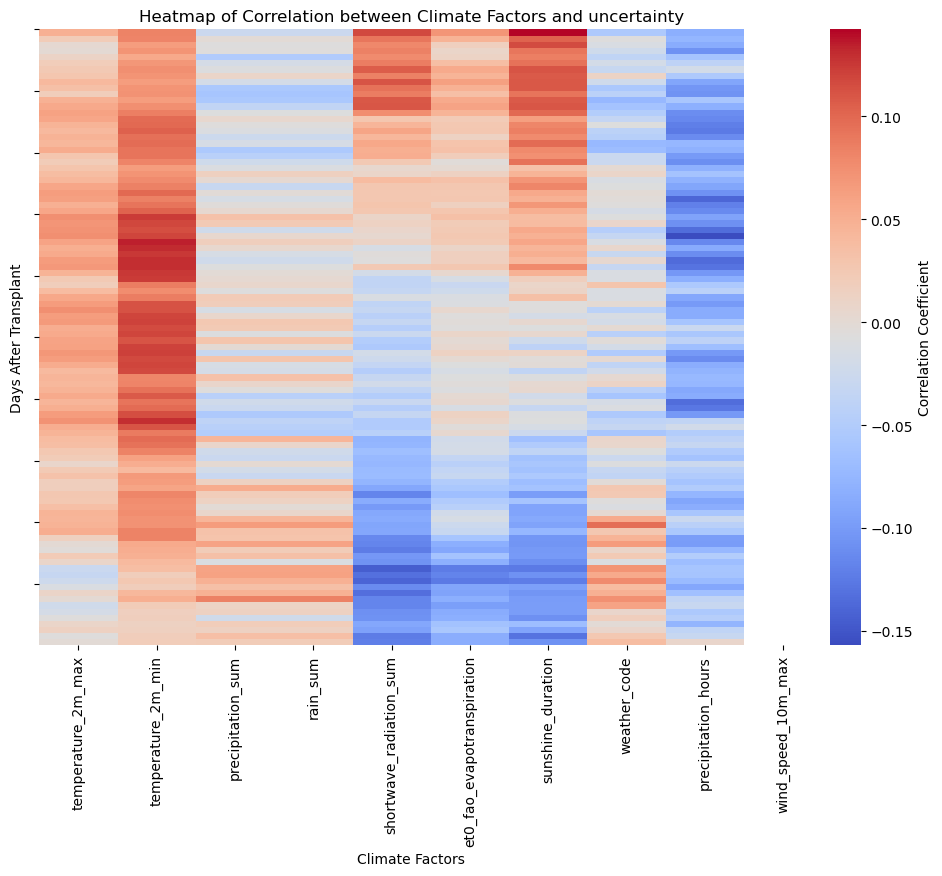

In [53]:
for sched in schedule.columns:

    target = schedule[sched]
    climate_correlations = calculate_climate_correlations(climate_data, target)
    plot_climate_heatmap(climate_correlations, f'Heatmap of Correlation between Climate Factors and {sched}')

In [57]:
y.shape

(3790, 40)

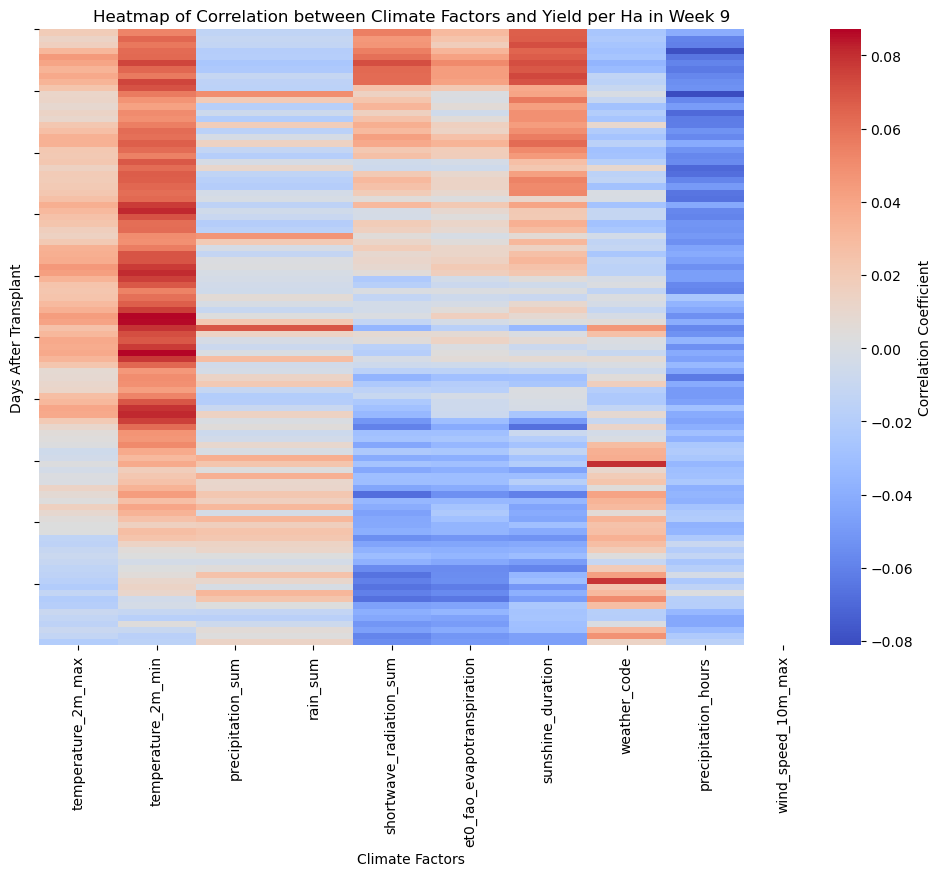

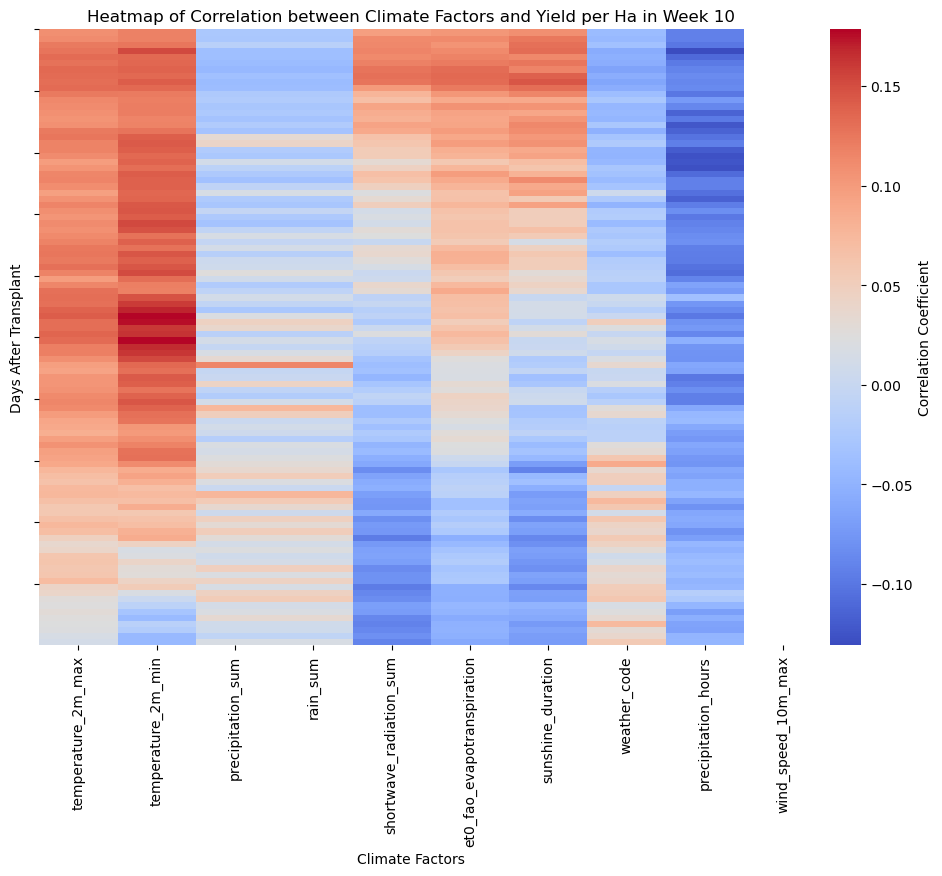

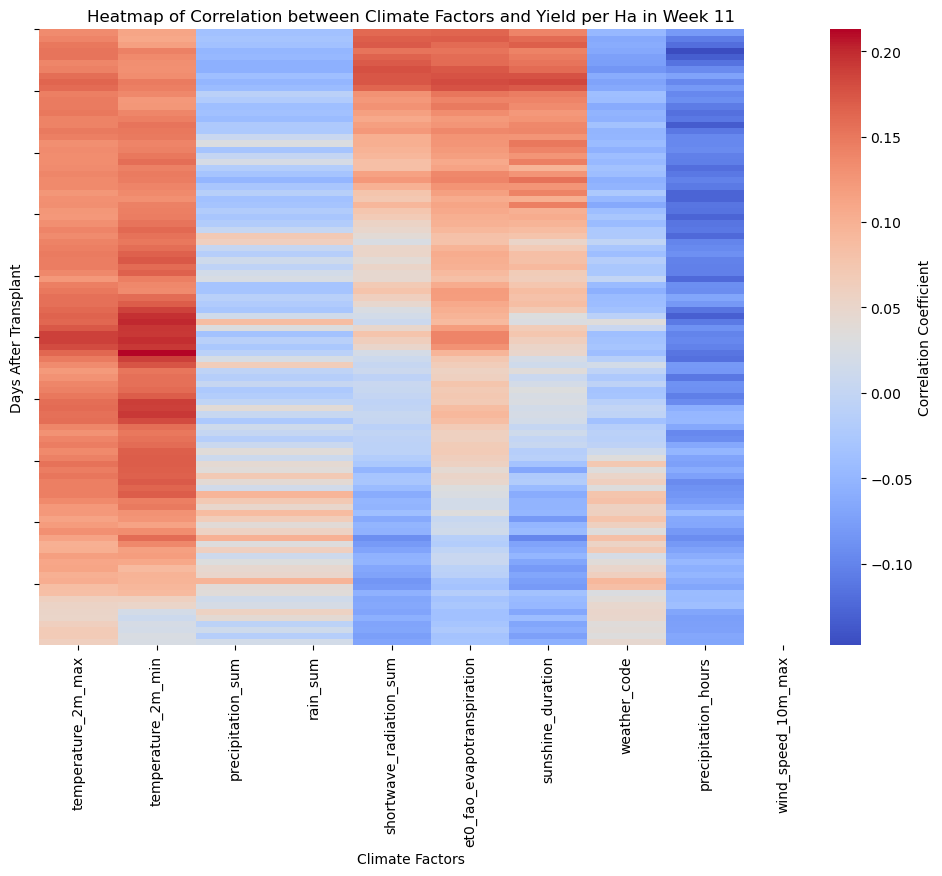

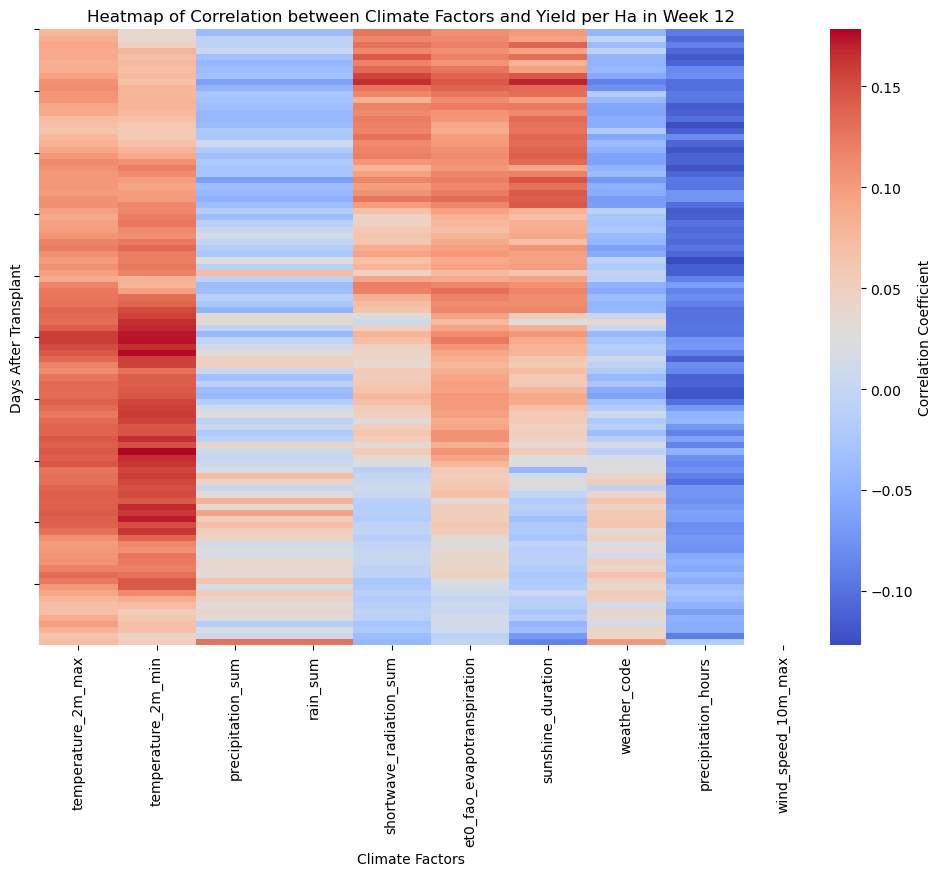

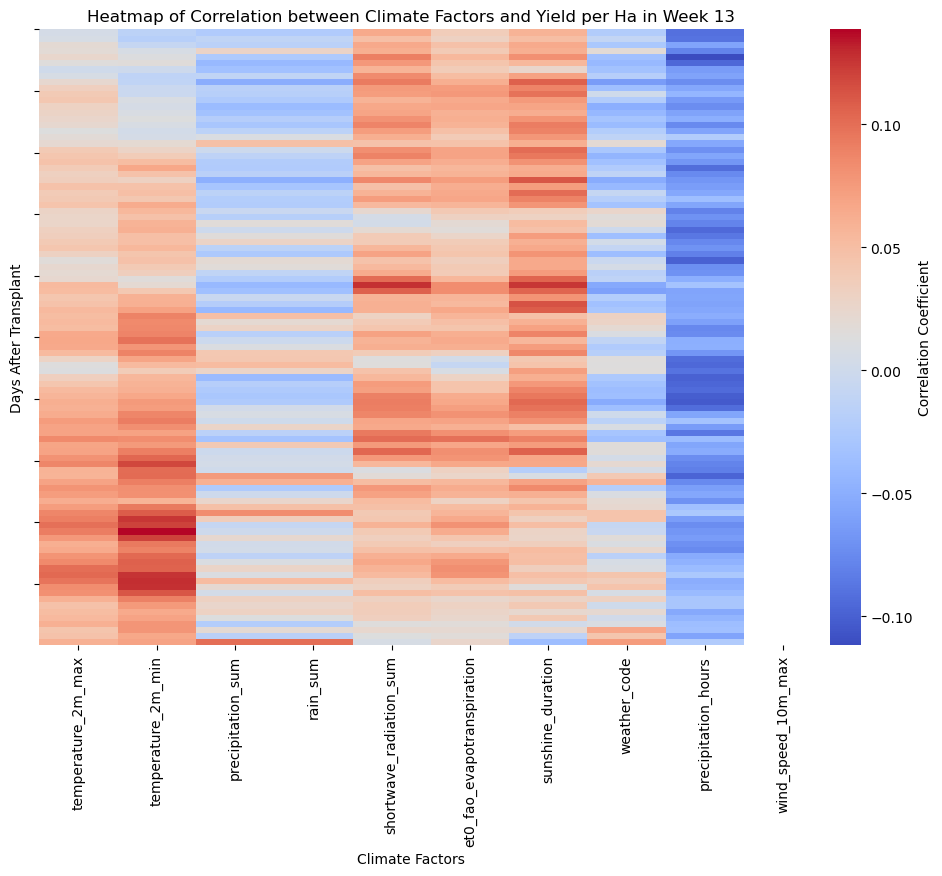

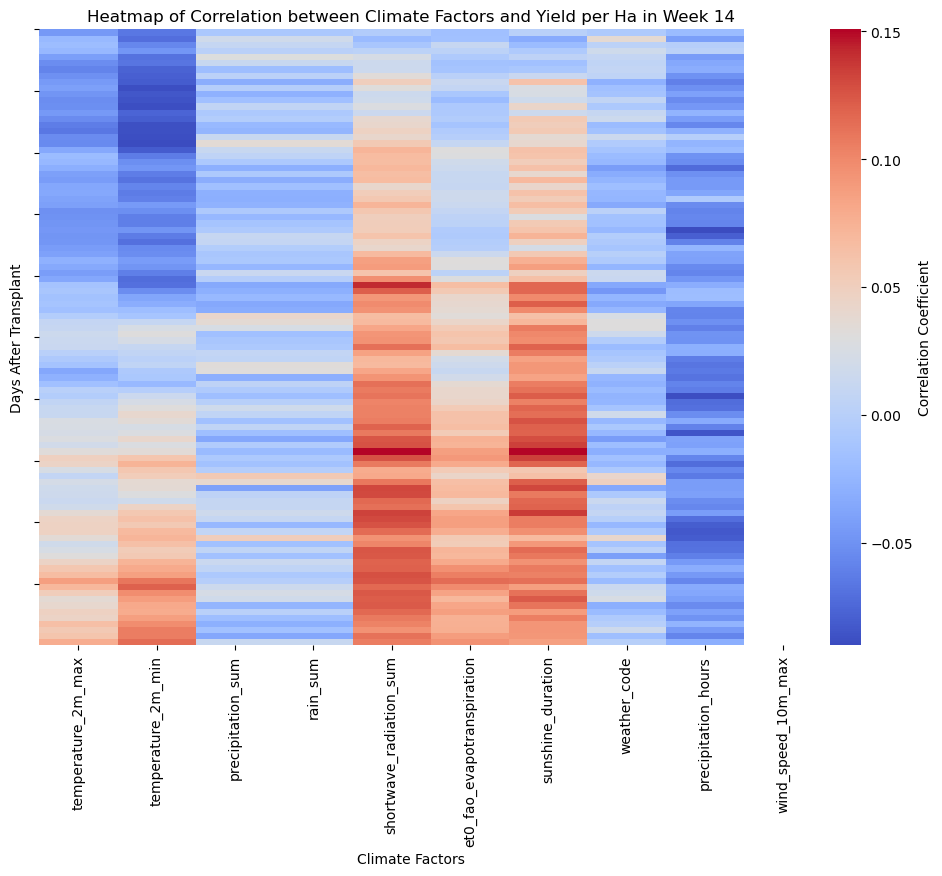

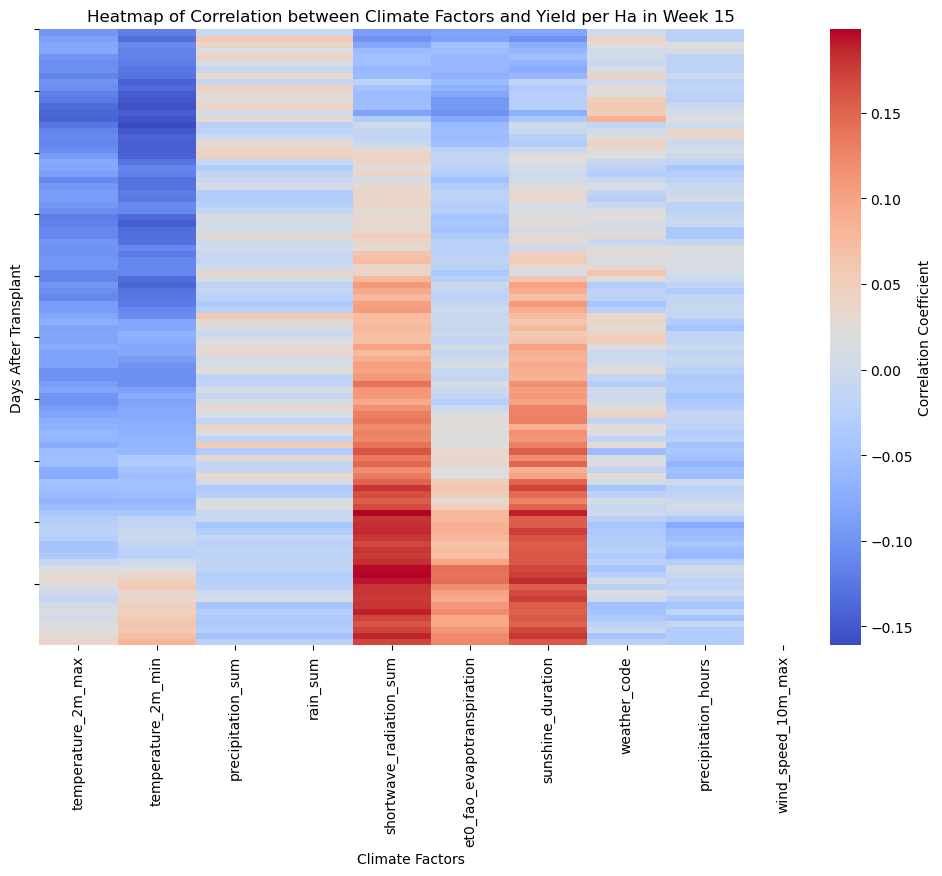

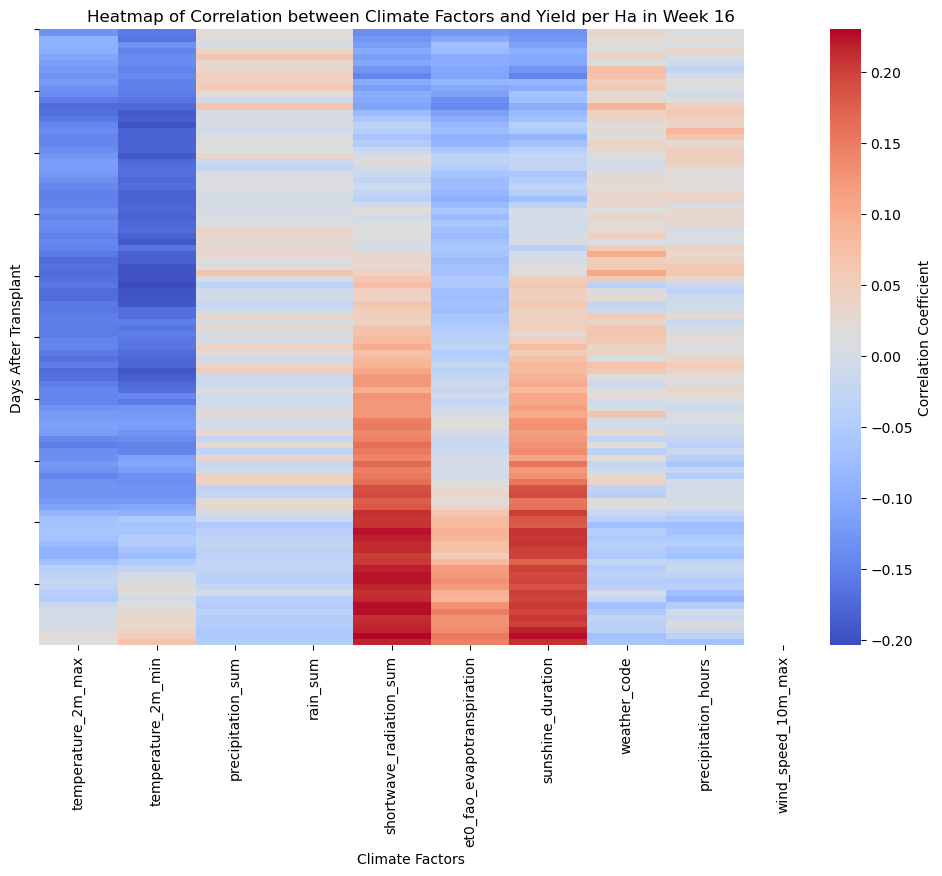

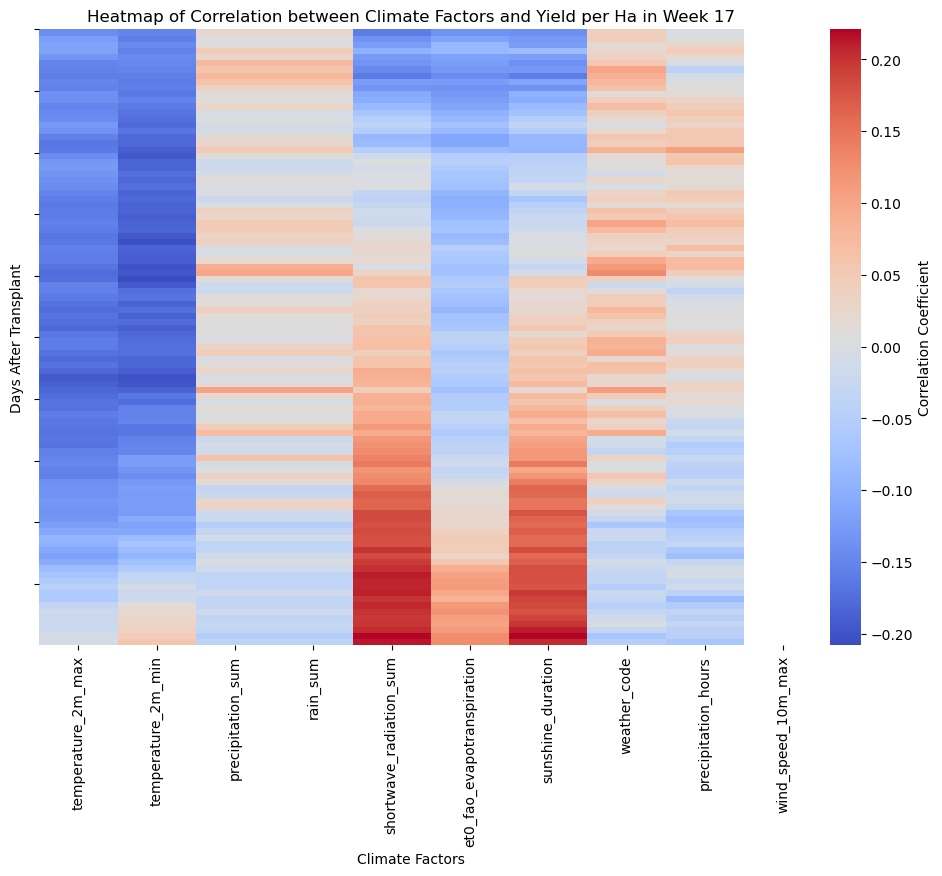

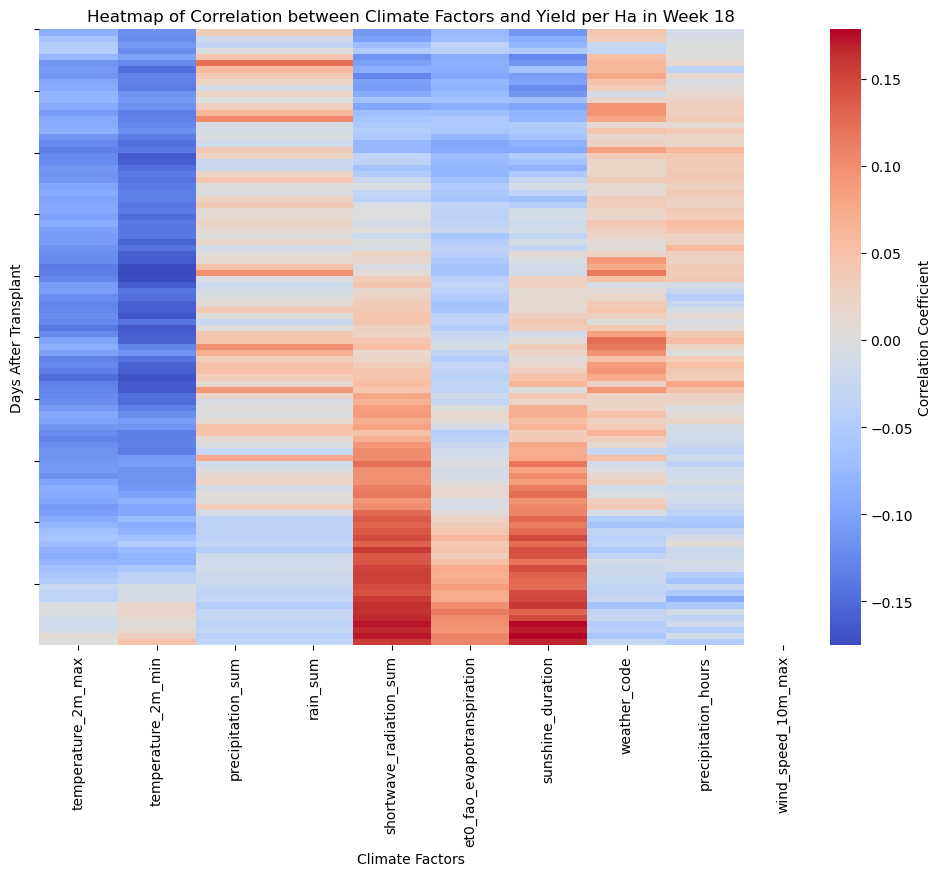

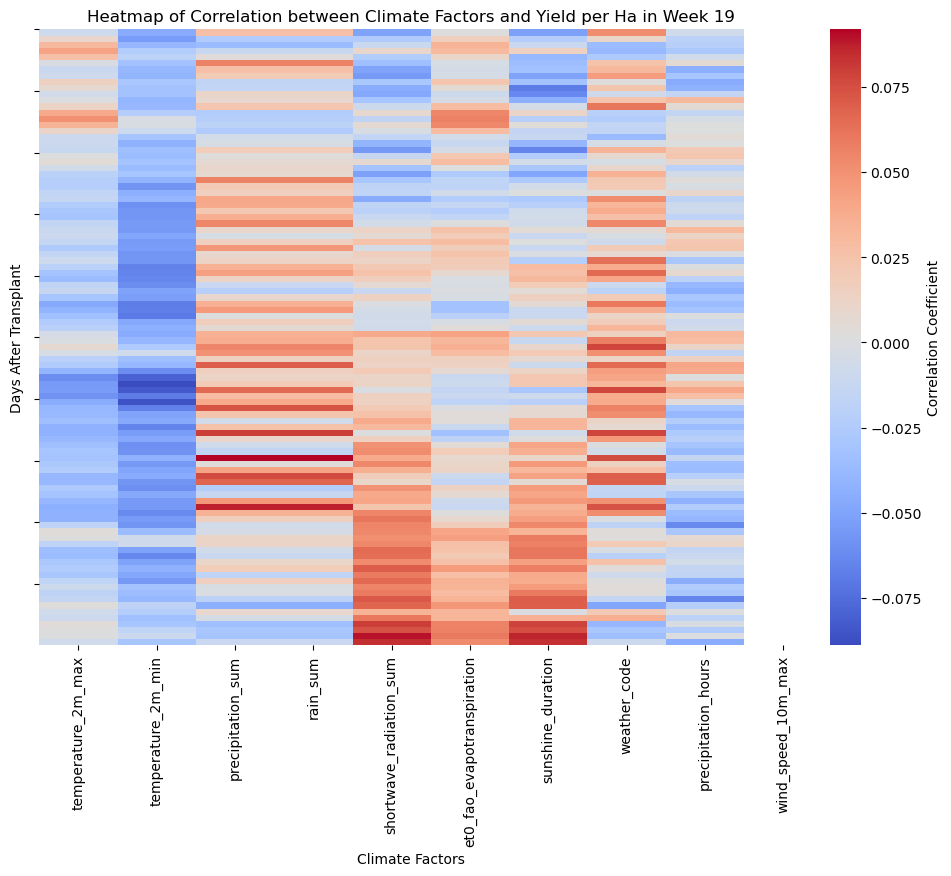

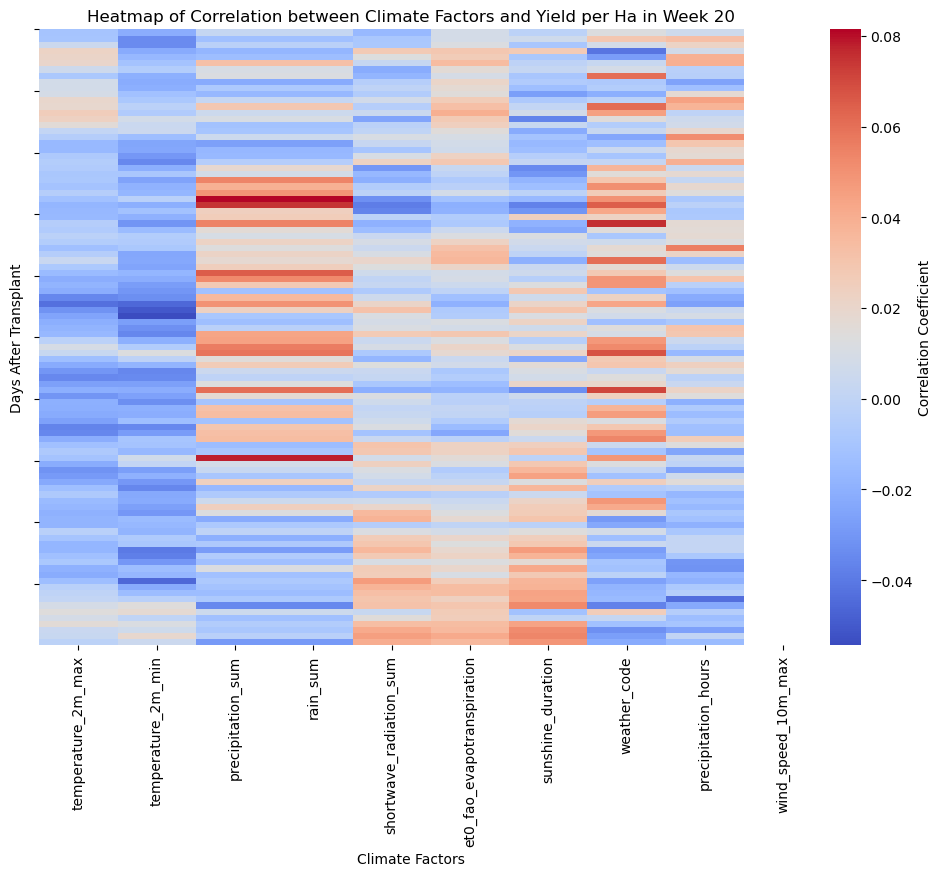

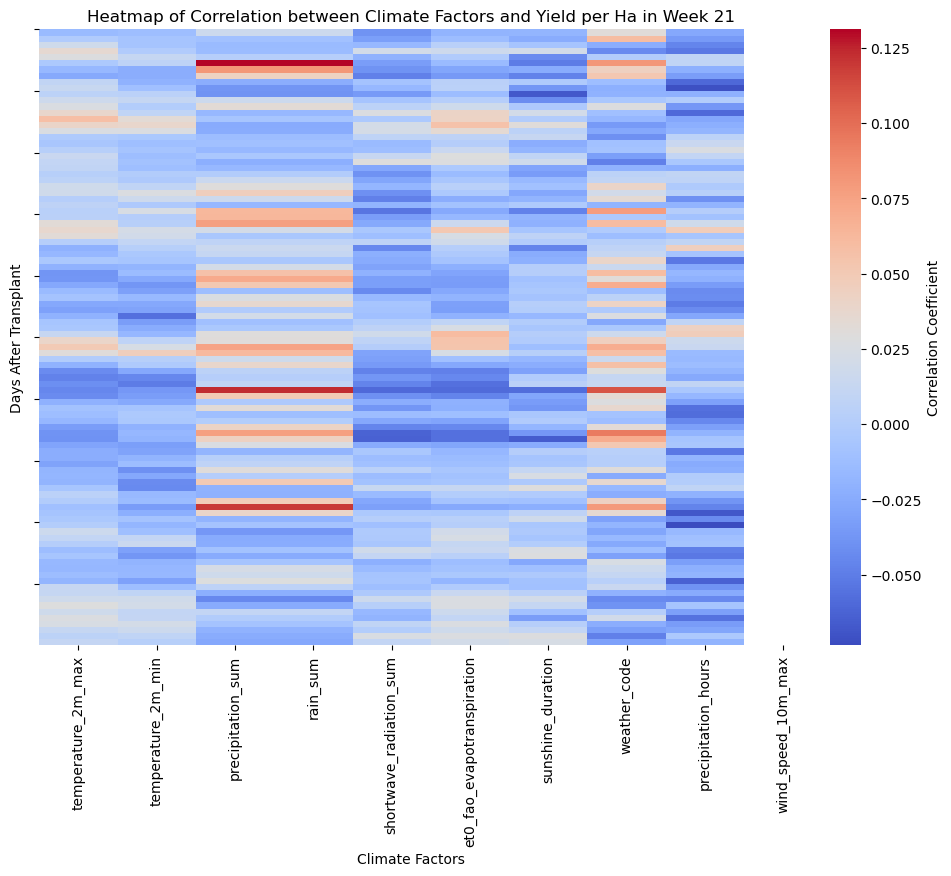

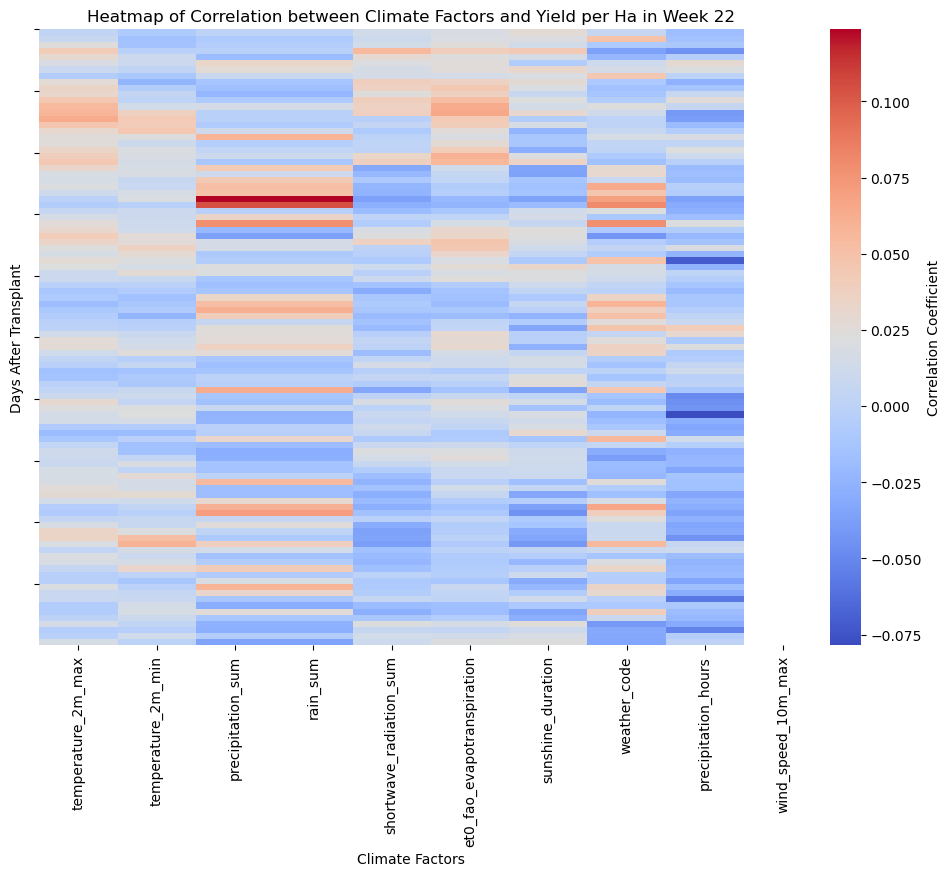

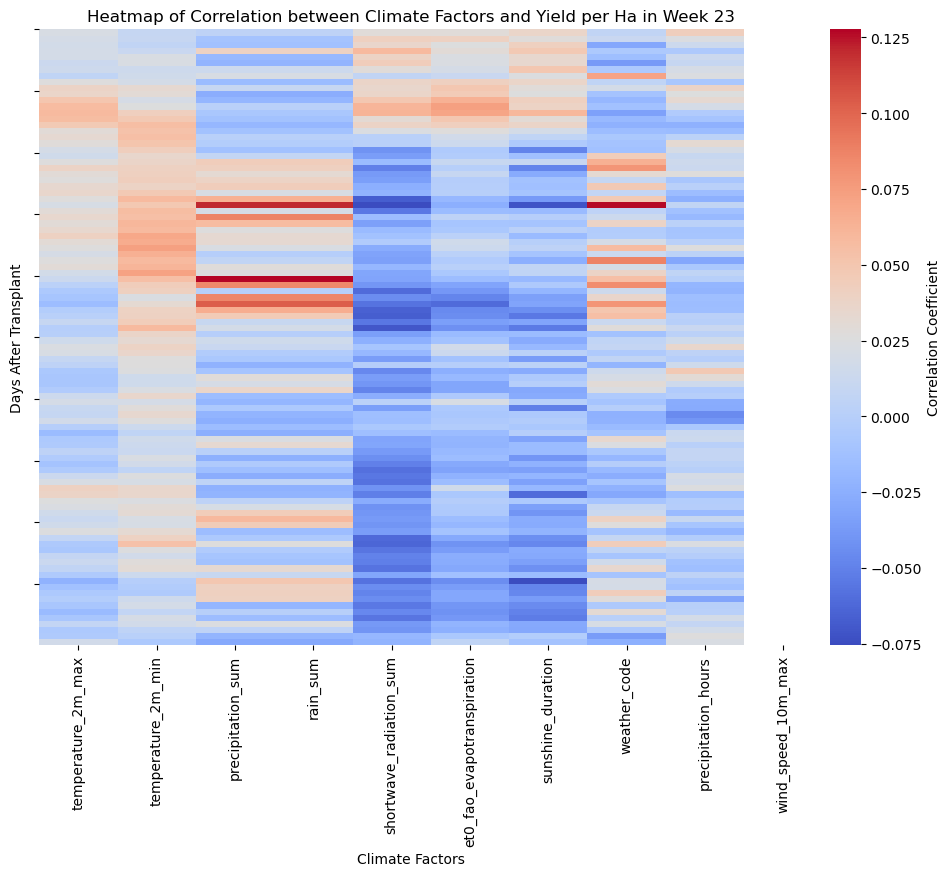

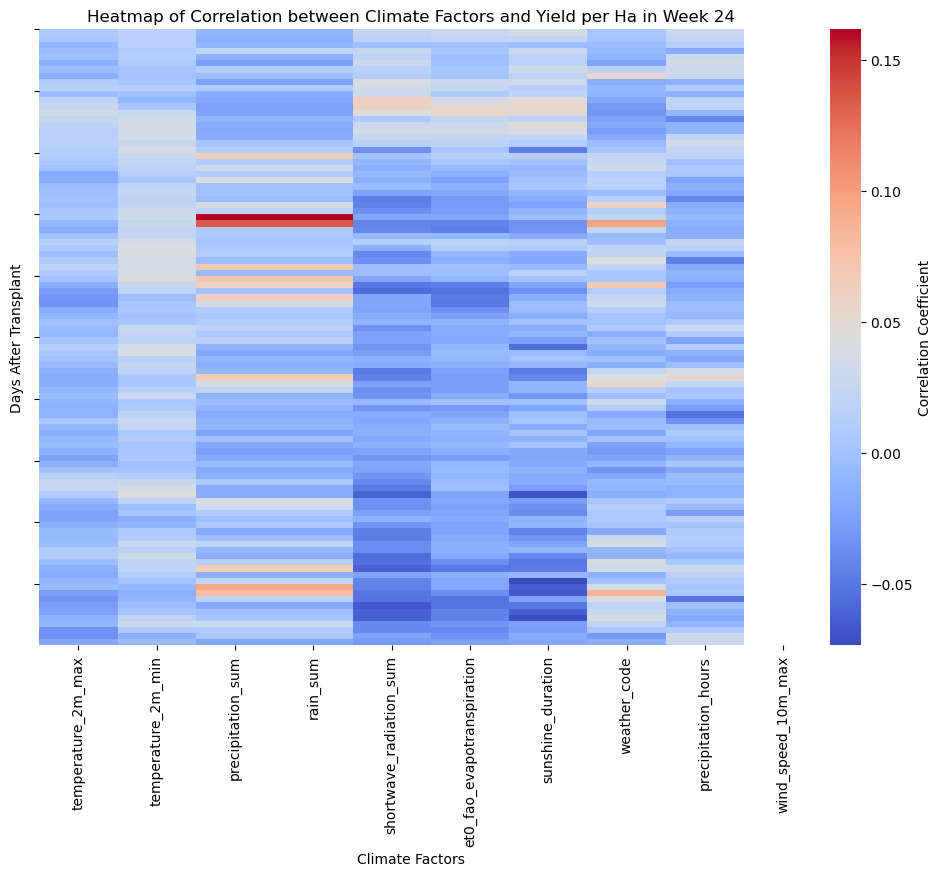

In [58]:
for week in range(9,25):

    target = y[:,week]/meta.Ha
    climate_correlations = calculate_climate_correlations(climate_data, target)
    plot_climate_heatmap(climate_correlations, f'Heatmap of Correlation between Climate Factors and Yield per Ha in Week {week}')

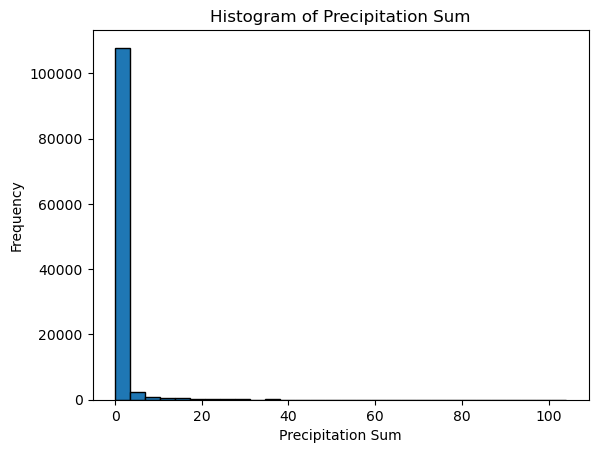

In [7]:
plt.hist(df['precipitation_sum'], bins=30, edgecolor='black')
plt.title('Histogram of Precipitation Sum')
plt.xlabel('Precipitation Sum')
plt.ylabel('Frequency')
plt.show()